# Step 1: Setting the Stage
Let's gather our Python tools for exploring and classifying the Iris dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 2: Load and Explore the Iris Dataset
Examine this classic dataset containing measurements from three Iris species.

In [ ]:
# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Display dataset information
print("Dataset Description:")
print("-------------------")
print(iris.DESCR)

# Show first few rows of data
print("\nFirst few rows of the dataset:")
print("-------------------")
print(pd.DataFrame(X, columns=iris.feature_names).head())

Dataset Description:
-------------------
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distr

# Step 3: Splitting the Dataset
Divide our data into training and testing sets to evaluate our models.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")


Training set size: 120
Testing set size: 30


# Step 4: Train a Single Decision Tree
Create our baseline model using a single decision tree.



In [ ]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"\nDecision Tree Accuracy: {dt_accuracy:.3f}")


Decision Tree Accuracy: 1.000


# Step 5: Train the Random Forest Classifier
Enhance our predictions by combining multiple trees.

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.3f}")

Random Forest Accuracy: 1.000


# Step 6: Visualizing Feature Importances
Discover which features are most crucial for classification.

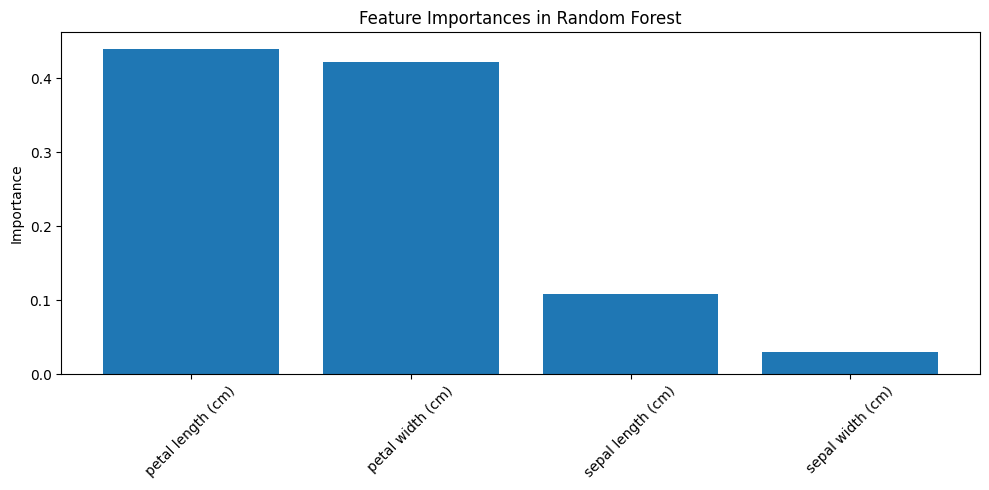

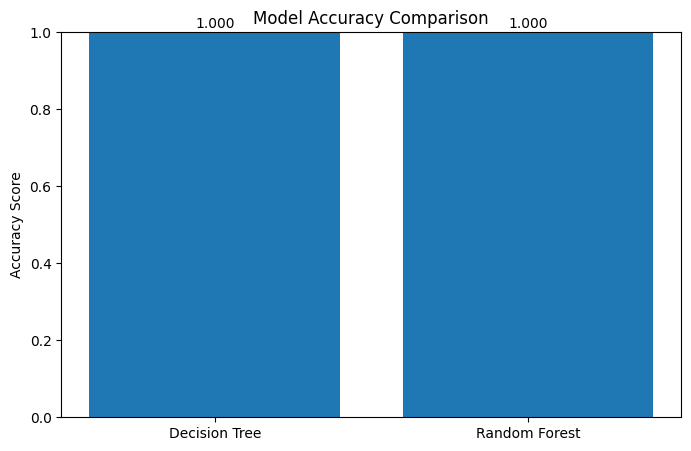

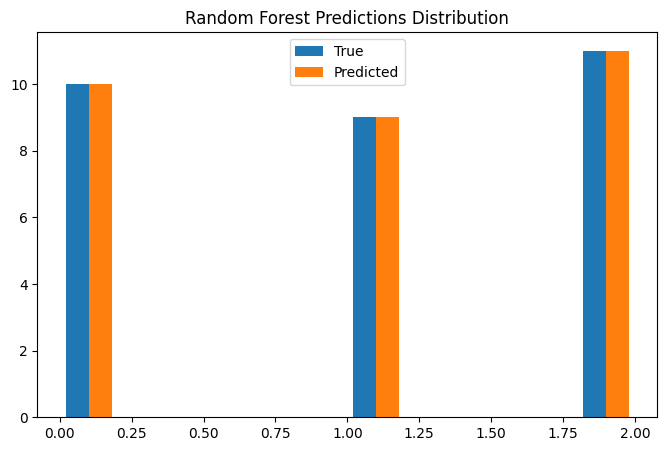

In [ ]:
# Calculate feature importances
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = iris.feature_names

# Create feature importance plot
plt.figure(figsize=(10, 5))
plt.title('Feature Importances in Random Forest')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# Additional visualization comparing accuracies
# =====================================

plt.figure(figsize=(8, 5))
plt.bar(['Decision Tree', 'Random Forest'], [dt_accuracy, rf_accuracy])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
for i, v in enumerate([dt_accuracy, rf_accuracy]):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')
plt.show()

# Visualize predictions distribution
# =====================================

def plot_prediction_distribution(y_true, y_pred, title):
    plt.figure(figsize=(8, 5))
    plt.hist([y_true, y_pred], label=['True', 'Predicted'])
    plt.title(title)
    plt.legend()
    plt.show()

plot_prediction_distribution(y_test, y_pred_rf, 'Random Forest Predictions Distribution')